# Average Air Quality in Mornings and Nights in an Italian City

## 1. Introduction

Air pollution is one of the leading causes of a number of adverse health problems. Measuring air quality in urban areas is important for regulating outdoor activities and preserving a healthy lifestyle. Air quality is measured through different sensors that detect pollutants and particles in the air. Based on this detection, the air quality is placed on an AQI that ranges from 0-500, or “good” to “hazardous” air quality (Lemeš, 2018) . The AQI is affected by different environmental situations like wind or the seasons, as windy days can carry pollutants to different areas and heating seasons like winter have worse air quality overall (Chen et al., 2015). On a daily basis, the air quality varies with a surge in activities that induce more air pollution, such as intense traffic during rush hour (Trozzi et al., 1999). 

This begs us to ask the question: ***How does the average sensor response used to determine air quality index differ between mornings and nights in an Italian city from 2004 to 2005?***

For our research, we are using the dataset <a href="https://archive.ics.uci.edu/dataset/360/air+quality">Air Quality</a> from the UCI machine learning repository. It contains responses to gas and particle sensors placed in a highly polluted area of an Italian city. This data was collected from 2004-2005 and depicts 9348 observations of hourly averaged concentrations of different chemical air pollutants at that point in time. Some of this data is missing and those cases will be removed from our research. Our variables of interest are the ```date```, ```time```, and the hourly averaged sensor response columns of ``` PT08.S1``` targetting carbon monoxide, ```PT08.S2``` targetting non-metallic hydrocarbons, ``` PT08.S3``` targetting NO<sub>x</sub> , ```PT08.S4``` targetting NO<sub>2</sub>, and ```PT08.S5``` targetting O<sub>3</sub>.

## 2. Preliminary Results

### 2.1. Loading the relevant libraries

In [1]:
library(dplyr)
library(tidyr)
library(lubridate)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 2.2. Reading the dataset from the web

In [2]:
# URL of the dataset on UCI Machine Learning Repository
url <- "https://archive.ics.uci.edu/static/public/360/air+quality.zip"

# Download the zip file and extract it
download.file(url, destfile = "air_quality.zip")
unzip("air_quality.zip")

# Read the dataset into R
air_quality <- read.csv("AirQualityUCI.csv", sep = ";", header = TRUE, na.strings = "-200")

# View the first few rows of the dataset
head(air_quality)


,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,X,X.1
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>
1,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NA,NA
2,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NA,NA
3,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NA,NA
4,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NA,NA
5,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NA,NA
6,10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848",NA,NA


### 2.3 Cleaning and wrangling the data into a tidy format

In [3]:
# Clean the data: Convert commas to dots for numeric columns, remove unwanted columns (X, X.1), and remove NA columns
air_quality_cleaned <- air_quality |>
  mutate_at(vars(-Date, -Time), ~as.numeric(gsub(",", ".", .))) |>
  select(-X, -X.1)

# Convert Date and Time columns to proper formats
air_quality_cleaned$Date <- as.Date(air_quality_cleaned$Date, format = "%d/%m/%Y")
air_quality_cleaned$Time <- as.POSIXct(air_quality_cleaned$Time, format = "%H.%M.%S")

head(air_quality_cleaned)


,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<date>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2004-03-10,2023-07-30 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2004-03-10,2023-07-30 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2004-03-10,2023-07-30 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2004-03-10,2023-07-30 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,2004-03-10,2023-07-30 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,2004-03-10,2023-07-30 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


In [4]:
# Rename the column names to more descriptive names
col_names <- c("Date", "Time", "CO_Concentration", "PT08_S1_CO_Sensor", "NMHC_Concentration",
               "C6H6_Concentration", "PT08_S2_NMHC_Sensor", "NOx_Concentration", "PT08_S3_NOx_Sensor",
               "NO2_Concentration", "PT08_S4_NO2_Sensor", "PT08_S5_O3_Sensor", "Temperature", "Relative_Humidity", "Absolute_Humidity")

colnames(air_quality_cleaned) <- col_names


In [5]:
head(air_quality_cleaned)

,Date,Time,CO_Concentration,PT08_S1_CO_Sensor,NMHC_Concentration,C6H6_Concentration,PT08_S2_NMHC_Sensor,NOx_Concentration,PT08_S3_NOx_Sensor,NO2_Concentration,PT08_S4_NO2_Sensor,PT08_S5_O3_Sensor,Temperature,Relative_Humidity,Absolute_Humidity
,<date>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2004-03-10,2023-07-30 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2004-03-10,2023-07-30 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2004-03-10,2023-07-30 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2004-03-10,2023-07-30 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,2004-03-10,2023-07-30 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,2004-03-10,2023-07-30 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


### 2.4 Plotting relevant data

[1] "Plot 1: Hourly Averaged Sensor Responses"


Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”


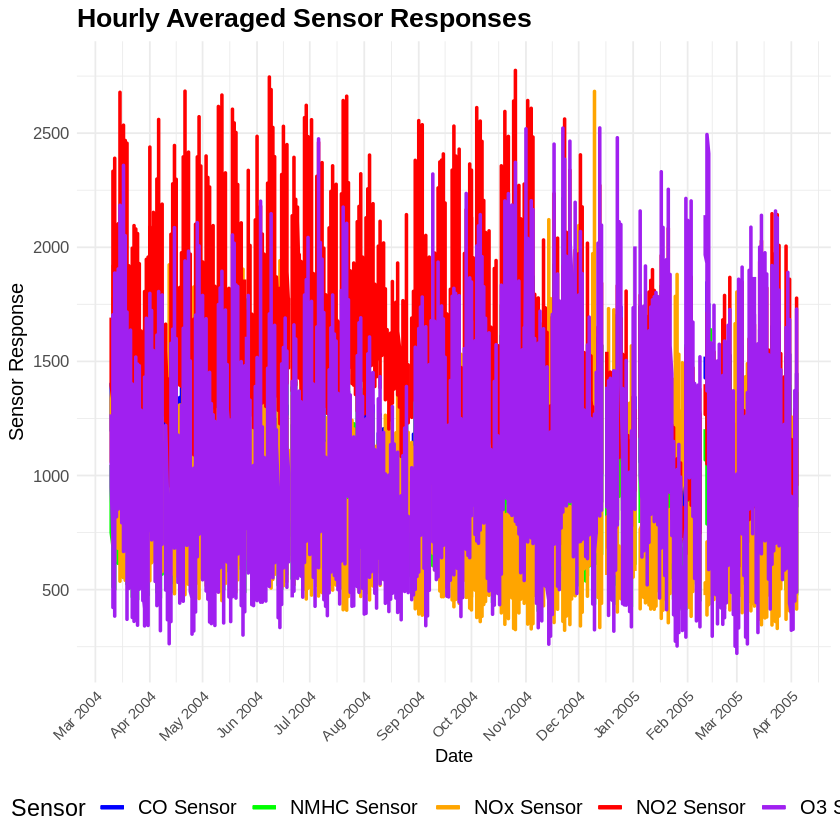

In [6]:
print("Plot 1: Hourly Averaged Sensor Responses")


# Create the plot
air_quality_cleaned_plot <- ggplot(air_quality_cleaned, aes(x = Date)) +
  geom_line(aes(y = PT08_S1_CO_Sensor, color = "CO Sensor"), size = 1) +
  geom_line(aes(y = PT08_S2_NMHC_Sensor, color = "NMHC Sensor"), size = 1) +
  geom_line(aes(y = PT08_S3_NOx_Sensor, color = "NOx Sensor"), size = 1) +
  geom_line(aes(y = PT08_S4_NO2_Sensor, color = "NO2 Sensor"), size = 1) +
  geom_line(aes(y = PT08_S5_O3_Sensor, color = "O3 Sensor"), size = 1) +
  labs(title = "Hourly Averaged Sensor Responses",
       x = "Date",
       y = "Sensor Response",
       color = "Sensor") +
  scale_color_manual(values = c("CO Sensor" = "blue", "NMHC Sensor" = "green", "NOx Sensor" = "orange", "NO2 Sensor" = "red", "O3 Sensor" = "purple")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 10),  # Adjust the size of y-axis labels
    axis.title.y = element_text(size = 12),  # Adjust the size of y-axis title
    plot.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.position = "bottom"
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  scale_y_continuous(breaks = seq(0, 2500, by = 500))  # Adjust the y-axis tick marks

air_quality_cleaned_plot



In [ ]:
print("Plot 2: Hourly Averaged Sensor Responses")


# Pivot the data to long format for ggplot
air_quality_melted <- pivot_longer(air_quality_cleaned, 
                                   cols = starts_with("PT08_S"), 
                                   names_to = "Sensor",
                                   values_to = "Sensor_Response")

# Create the plot
air_quality_sensor_plots <- ggplot(air_quality_melted, aes(x = Date, y = Sensor_Response, color = Sensor)) +
  geom_line(size = 1) +
  labs(title = "Hourly Averaged Sensor Responses",
       x = "Date",
       y = "Sensor Response",
       color = "Sensor") +
  scale_color_manual(values = c("PT08_S1_CO_Sensor" = "blue", "PT08_S2_NMHC_Sensor" = "green", 
                                "PT08_S3_NOx_Sensor" = "orange", "PT08_S4_NO2_Sensor" = "red",
                                "PT08_S5_O3_Sensor" = "purple")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 10),  # Adjust the size of y-axis labels
    axis.title.y = element_text(size = 12),  # Adjust the size of y-axis title
    plot.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.position = "bottom"
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  scale_y_continuous(breaks = seq(0, 2500, by = 500))  # Adjust the y-axis tick marks

# Separate plots for each sensor using facets
air_quality_sensor_plots_faceted <- air_quality_sensor_plots + 
  facet_wrap(~ Sensor, nrow = 5)

air_quality_sensor_plots_faceted

[1] "Plot 2: Hourly Averaged Sensor Responses"


Warning message:
“Removed 570 row(s) containing missing values (geom_path).”


In [ ]:
print("Table 1: Summary Statistics of Each Sensor Responses")

# Group the data by "Sensor" and calculate summary statistics
sensor_summary <- air_quality_melted %>%
  group_by(Sensor) %>%
  summarize(
    Mean_Sensor_Response = mean(Sensor_Response, na.rm = TRUE),
    Median_Sensor_Response = median(Sensor_Response, na.rm = TRUE),
    SD_Sensor_Response = sd(Sensor_Response, na.rm = TRUE),
    Min_Sensor_Response = min(Sensor_Response, na.rm = TRUE),
    Max_Sensor_Response = max(Sensor_Response, na.rm = TRUE)
  )

# Print the tibble
sensor_summary

### 2.5. Computing our estimates

In [ ]:
air_quality_cleaned <- air_quality_cleaned %>%
  mutate(Time = as.POSIXct(Time, format = "%H:%M:%S"),  # Convert Time to POSIXct format
         Day_Night = ifelse(hour(Time) < 12, "Day", "Night"),  # Create Day_Night column
         AQI_Estimator = rowMeans(select(., PT08_S1_CO_Sensor,PT08_S2_NMHC_Sensor,PT08_S3_NOx_Sensor, PT08_S4_NO2_Sensor, PT08_S5_O3_Sensor),
                                       na.rm = TRUE))  # Calculate mean of sensor values

# Select only the Day_Night column and the new Mean_Sensor_Values column
air_quality_final <- air_quality_cleaned %>%
  select(Day_Night, AQI_Estimator) |>
  filter(!is.na(AQI_Estimator))

head(air_quality_final)

In [ ]:
print("Plot 3: Box Plot of AQI Estimator Values by Day and Night")

# Create a box plot
boxplot <- ggplot(air_quality_final, aes(x = Day_Night, y = AQI_Estimator)) +
  geom_boxplot(fill = "skyblue", color = "black", outlier.shape = NA) +
  labs(title = "Box Plot of AQI Estimator Values by Day and Night",
       x = "Day/Night",
       y = "Mean Sensor Values") +
  theme_minimal()

print(boxplot)

In [ ]:
print("Table 2: Summary Statistics of AQI Estimator by Day and Night")


# Group the data by "Day_Night" and calculate the mean, median, standard deviation, and quartiles of "AQI_Estimator"
stats_by_day_night <- air_quality_final %>%
  group_by(Day_Night) %>%
  summarize(
    AQI_Estimator_Mean = mean(AQI_Estimator, na.rm = TRUE),
    AQI_Estimator_Median = median(AQI_Estimator, na.rm = TRUE),
    AQI_Estimator_SD = sd(AQI_Estimator, na.rm = TRUE),
    AQI_Estimator_Q1 = quantile(AQI_Estimator, 0.25, na.rm = TRUE),
    AQI_Estimator_Q3 = quantile(AQI_Estimator, 0.75, na.rm = TRUE)
  )

# Print the tibble
stats_by_day_night

In [ ]:


# Calculate the means for Day and Night
mean_day <- mean(air_quality_final$AQI_Estimator[air_quality_final$Day_Night == "Day"], na.rm = TRUE)
mean_night <- mean(air_quality_final$AQI_Estimator[air_quality_final$Day_Night == "Night"], na.rm = TRUE)

print("Plot 4: Distribution of AQI Estimator for Day and Night")

ggplot(air_quality_final, aes(x = AQI_Estimator, fill = Day_Night)) +
  geom_histogram(binwidth = 50, position = "dodge", alpha = 0.7) +
  geom_vline(xintercept = mean_day, linetype = "dashed", color = "navyblue", size = 1) +
  geom_vline(xintercept = mean_night, linetype = "dashed", color = "springgreen3", size = 1) +
  labs(title = "Distribution of AQI Estimator for Day and Night",
       x = "AQI Estimator",
       y = "Frequency") +
  scale_x_continuous(breaks = seq(0, 2500, by = 250)) +
  scale_fill_manual(values = c("Day" = "blue", "Night" = "green")) +
  theme_minimal() +
  facet_wrap(~Day_Night, ncol = 1)

## 3. Methods: Plan

<span style="color:red">add what's good about our findings so far</span>.

We expect to find that, on average, the air quality is worse in the mornings. Based on previous research on the topic, the highest concentrations of different pollutants occur in the morning, likely due to more transportation use and an increased amount of road dust (Chen et al., 2015).

The finding of this research could affect public health measures in Italian cities to account for better/worse air quality at different times of the day. Worse air quality in the city can lead to further precautions (e.g. wearing masks, staying indoors, limiting outdoor air intake) whereas outdoor activities could be encouraged in times with better air quality.

This could lead to further research on the long term health effects of exposure to poor air quality in cities: how does consistent exposure to poor air quality affect one’s long term health? Another question on this same note could be what the immediate health effects from exposure to poor air quality are.

## 4. References

Chen, W., Tang, H., & Zhao, H. (2015). Diurnal, weekly and monthly spatial variations of air pollutants and air  quality of Beijing. Atmospheric Environment, 119, 21-34. https://doi.org/10.1016/j.atmosenv.2015.08.040

Lemeš, S. (2018). Air Quality Index (AQI) - Comparative Study and Assessment of an Appropriate Model for B&H. 12th Scientific/Research Symposium with International Participation. 

Trozzi, C.,  Vaccaro, R., & Crocetti, S. (1999). Air quality index and its use in Italy’s management plans. Science of the Total Environment. 235(1-3),387-389. https://doi.org/10.1016/S0048-9697(99)00242-9
